**Metagenomic Discovery of Biomass-Degrading Genes and Genomes from Cow
Rumen**

Sushant Mane & David Bui



In [ ]:
!pip install Bio
# !pip install Squiggle

     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 2.3MB 8.1MB/s 


In [ ]:
import io
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from itertools import cycle
from Bio import SeqIO
from os import listdir, walk
from os.path import isfile, join

In [ ]:
from sklearn.metrics import plot_confusion_matrix, precision_recall_curve, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_extraction.text import CountVectorizer
from scipy import interp

In [ ]:
# from google.colab import drive
# # drive.mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)
# !python -m pip install bokeh==1.3.0
# !squiggle "/content/drive/MyDrive/Masters/CS286/cmc/3871318_57350.txt"

# !ls '/content/drive/MyDrive/Masters/CS286/NR'
POS_PATH = "/content/drive/MyDrive/Masters/CS286/FastaLichenan"
NEG_PATH = "/content/drive/MyDrive/Masters/CS286/NR"

POS_PATH = "/content/drive/MyDrive/Masters/CS286/reaction"
NEG_PATH = "/content/drive/MyDrive/Masters/CS286/no-reaction"


POS_PATH = "/content/drive/MyDrive/Masters/CS286/cmc"
NEG_PATH = "/content/drive/MyDrive/Masters/CS286/non-cmc"

def list_seq_files(dir_path):
  # print(lichenan_fasta_files)
  for ffile in dir_path:
    for seq_record in SeqIO.parse(POS_PATH + "/" + ffile, "fasta"):
        print("seq_record.id: ", seq_record.id)
        print("seq_record.seq: ", seq_record.seq)
        print("len(seq_record.seq): ", len(seq_record.seq))

lichenan_fasta_files = os.listdir(POS_PATH)
# list_seq_files(lichenan_fasta_files)

In [ ]:
def get_dir_files(dir): 
  files = [f for f in listdir(dir) if isfile(join(dir, f))]
  return files

def seq_map(folder, files): 
  IDToSequence = {}
  for next in files:
    nextPath = folder + '/'+ next
    sequenceName = next[:len(next)-4] # remove the .txt extension
    text_file = open(nextPath, "r")
    lines = text_file.readlines()
    sliced = lines[1:]
    combined = ''.join(sliced)
    IDToSequence[sequenceName] = combined.replace('\n', '').replace('\r', '')
  return IDToSequence


def seq_arr(folder, files):
  seq = []
  for next in files:
    nextPath = folder + '/'+ next
    sequenceName = next[:len(next)-4] # remove the .txt extension
    text_file = open(nextPath, "r")
    lines = text_file.readlines()
    sliced = lines[1:]
    combined = ''.join(sliced)
    seq.append(combined.replace('\n', '').replace('\r', ''))
  return seq


def print_seq(seq):
  for next in seq:
    name = 'Sequence ID: ' + str(next)
    sequence = 'Sequence below: \n' + seq[next]  + '\n'
    # print(name)
    # print(sequence)

# gather sequences
neg_samples_path = get_dir_files(NEG_PATH)
pos_samples_path = get_dir_files(POS_PATH)

neg_samples = seq_arr(NEG_PATH, neg_samples_path)
pos_samples = seq_arr(POS_PATH, pos_samples_path)

lists_of_seq = []
lists_of_seq.append(neg_samples)
lists_of_seq.append(pos_samples)

def addToData(lists): 
  classes = 0
  data = {'sequence': [], 'class': []}
  for seq in lists:
    prev = data['sequence']
    conca = prev + seq 
    seq_len = len(seq)
    data.update({'sequence': conca})
    class_list = []
    for i in range(seq_len):
      class_list.append(classes)
    prev_class = data['class']
    both_class = prev_class + class_list
    data.update({'class': both_class})
    classes = classes + 1
  return data

data = addToData(lists_of_seq)
cazy_data = pd.DataFrame(data)
# cazy_data.head()

K_MER = 3
def getKmers(sequence, size=K_MER):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

cazy_data['words'] = cazy_data.apply(lambda x: getKmers(x['sequence']), axis=1)
cazy_data = cazy_data.drop('sequence', axis=1)

cazy_texts = list(cazy_data['words'])
for item in range(len(cazy_texts)):
    cazy_texts[item] = ' '.join(cazy_texts[item])
y_data = cazy_data.iloc[:, 0].values    # class labels
# print(cazy_texts[2])
# print(y_data)

cv = CountVectorizer(ngram_range=(3,6))
X_cazy = cv.fit_transform(cazy_texts)
# print(X_cazy)
print(X_cazy.shape)
print(y_data.shape)

(84, 69289)
(84,)


[1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1]
number of samples for training:  (63, 69289) {0: 39, 1: 24}
number of samples for testing:  (21, 69289) {0: 11, 1: 10}


Training Confusion matrix:
Predicted   0   1
Actual           
0          39   0
1           0  24
training accuracy = 1.000 
precision = 1.000 
recall = 1.000 
f1 = 1.000


Testing Confusion matrix:
Predicted   0  1
Actual          
0          10  1
1           3  7
testing accuracy = 0.810 
precision = 0.820 
recall = 0.810 
f1 = 0.807


set()

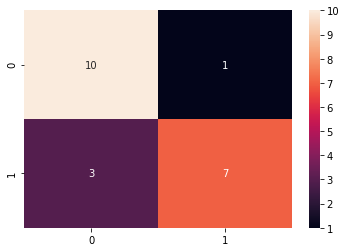

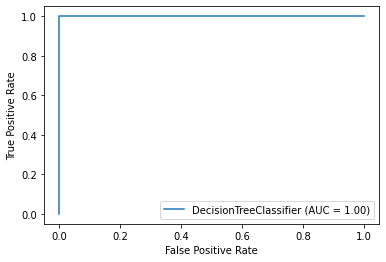

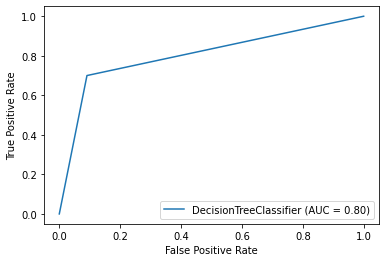

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cazy, y_data, random_state = 3, test_size = 0.25)

print(y_test)
def pp_cdist(y_samples):
  cdist = {0:0, 1:0}
  for sample in y_samples:
    cdist[sample] = cdist[sample] + 1
  return cdist

print("number of samples for training: ", X_train.shape, pp_cdist(y_train))
print("number of samples for testing: ", X_test.shape, pp_cdist(y_test))


# clf =  MultinomialNB(alpha=0.1)
clf = DecisionTreeClassifier()
# clf = RandomForestClassifier(n_estimators=100)
# clf = GradientBoostingClassifier(n_estimators=100)
# clf = SVC(kernel = 'linear')
# clf = SVC(kernel = 'rbf')
# clf = SVC(kernel = 'poly')
# clf = SVC(kernel = 'sigmoid')
# clf = AdaBoostClassifier()

model = clf.fit(X_train, y_train)
ytrain_pred = model.predict(X_train) 
ytest_pred = model.predict(X_test) 

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1


print("\n\nTraining Confusion matrix:")
print(pd.crosstab(pd.Series(y_train, name='Actual'), pd.Series(ytrain_pred, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_train, ytrain_pred)
print("training accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

print("\n\nTesting Confusion matrix:")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(ytest_pred, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_test, ytest_pred)
print("testing accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))



def plot_cm(cm):
  # plt.figure(figsize = (10, 10))
  # sn.heatmap(cm, annot=True)
  # sn.set(font_scale=0.8) # for label size
  sn.heatmap(cm, annot=True) # font size
  # plt.show()
cm = confusion_matrix(y_test, ytest_pred)
plot_cm(cm)

def plot_pr_roc_curves(X_phase, y_phase):
  y_score = clf.decision_function(X_phase)
  average_precision = average_precision_score(y_phase, y_score)
  disp = plot_precision_recall_curve(clf, X_phase, y_phase)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                    'AP={0:0.2f}'.format(average_precision))
  plot_roc_curve(clf, X_phase, y_phase)  
  plt.show()

plot_roc_curve(clf, X_train, y_train)  
plot_roc_curve(clf, X_test, y_test)  


# # print("Training Accuracy:", model.score(X_train, y_train))
# print("Training Accuracy:", metrics.accuracy_score(y_train, ytrain_pred))
# # print("Testing Accuracy:", model.score(X_test, y_test))
# print("Testing Accuracy:", metrics.accuracy_score(y_test, ytest_pred))

# print("precision:", precision_score(y_test, ytest_pred, average='micro'))
# print("recall:", recall_score(y_test, ytest_pred, average='micro'))
# print("f1:", f1_score(y_test, ytest_pred, average='micro'))


# print("precision:", precision_score(y_test, ytest_pred, average='macro'))
# print("recall:", recall_score(y_test, ytest_pred, average='macro'))
# print("f1:", f1_score(y_test, ytest_pred, average='macro'))

# from sklearn.metrics import classification_report
# print(classification_report(y_test, ytest_pred))

set(y_test) - set(ytest_pred)


{0}

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,12))

X_cazy = cv.fit_transform(cazy_texts)
print(X_cazy.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cazy, 
                                                    y_data, random_state = 3, test_size = 0.25)
print(y_train)

import numpy as np 
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
sss = ShuffleSplit(n_splits=1, test_size=0.1)


# data_size = 
# X = np.reshape(np.random.rand(data_size*2),(data_size,2))
# y = np.random.randint(2, size=data_size)

# sss.get_n_splits(X, y)
# train_index, test_index = next(sss.split(X, y)) 

# X_train, X_test = X[train_index], X[test_index] 
# y_train, y_test = y[train_index], y[test_index]

(81, 1183447)
[1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0
 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential


from sklearn.preprocessing import LabelEncoder, OneHotEncoder




# # The LabelEncoder encodes a sequence of bases as a sequence of integers.
# integer_encoder = LabelEncoder()  
# # The OneHotEncoder converts an array of integers to a sparse matrix where 
# # each row corresponds to one possible value of each feature.
# one_hot_encoder = OneHotEncoder(categories='auto')   
# input_features = []

# for sequence in sequences:
#   integer_encoded = integer_encoder.fit_transform(list(sequence))
#   integer_encoded = np.array(integer_encoded).reshape(-1, 1)
#   one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
#   input_features.append(one_hot_encoded.toarray())

# np.set_printoptions(threshold=40)
# input_features = np.stack(input_features)
# print("Example sequence\n-----------------------")
# print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
# print('One hot encoding of Sequence #1:\n',input_features[0].T)


model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, 
                 input_shape=(X_train.shape[1], 4)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['binary_accuracy'])
model.summary()
history = model.fit(X_train, y_train, 
                    epochs=50, verbose=0, validation_split=0.25)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

(81, 1183447)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1183436, 32)       1568      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 295859, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9467488)           0         
_________________________________________________________________
dense (Dense)                (None, 16)                151479824 
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 151,481,426
Trainable params: 151,481,426
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

In [ ]:
# function to convert a DNA sequence string to a numpy array
# converts to lower case, changes any non 'acgt' characters to 'n'
import numpy as np
import re
def string_to_array(my_string):
    my_string = my_string.lower()
    my_string = re.sub('[^acgt]', 'z', my_string)
    my_array = np.array(list(my_string))
    return my_array

# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

In [ ]:
# function to one-hot encode a DNA sequence string

from sklearn.preprocessing import  OneHotEncoder
def one_hot_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded
  

In [ ]:
test_sequence = 'AACGCGGTTNN'
arr = string_to_array(test_sequence)
print(arr)
one_hot_encoder(arr)

['a' 'a' 'c' 'g' 'c' 'g' 'g' 't' 't' 'z' 'z']


array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
def getKmers(sequence, size):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

    

In [ ]:
mySeq = 'CATGGCCATCCCCCCCCGAGCGGGGGGGGGG'
words = getKmers(mySeq, size=6)
sentence1 = ' '.join(words)
# sentence
mySeq2 = 'GATGGCCATCCCCGCCCGAGCGGGGGGGG'
mySeq3 = 'CATGGCCATCCCCGCCCGAGCGGGCGGGG'
sentence2 = ' '.join(getKmers(mySeq2, size=6))
sentence3 = ' '.join(getKmers(mySeq3, size=6))

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([sentence1, sentence2, sentence3]).toarray()
X
# cv


array([[1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 5, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 3, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1]])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X_train, X_test, y_train, y_train = train_test_split(X_cazy, 
                                                    y_data, random_state = 3, test_size = 0.25)
X_train = X_cazy
X_test = X_test
y_train = y_train
y_train = y_test

features_s = tf.sparse.reorder(X_cazy)



# # The LabelEncoder encodes a sequence of bases as a sequence of integers.
# integer_encoder = LabelEncoder()  
# # The OneHotEncoder converts an array of integers to a sparse matrix where 
# # each row corresponds to one possible value of each feature.
# one_hot_encoder = OneHotEncoder(categories='auto')   
# input_features = []

# for sequence in sequences:
#   integer_encoded = integer_encoder.fit_transform(list(sequence))
#   integer_encoded = np.array(integer_encoded).reshape(-1, 1)
#   one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
#   input_features.append(one_hot_encoded.toarray())

# np.set_printoptions(threshold=40)
# input_features = np.stack(input_features)
# print("Example sequence\n-----------------------")
# print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
# print('One hot encoding of Sequence #1:\n',input_features[0].T)


model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, 
                 input_shape=(X_train.shape[1], 4)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['binary_accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=50, verbose=0)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
names = ["Nearest Neighbors", "Decision Tree", "Random Forest", "Neural Net",
         "AdaBoost", "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    DecisionTreeClassifier(max_depth = 5),
    RandomForestClassifier(max_depth = 5,  n_estimators =10, max_features =1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'sigmoid')
]

models = zip(names, classifiers)
X_train, X_test, y_train, y_test = train_test_split(X_cazy, y_data, random_state = 3, test_size = 0.25)
seed = 1
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state =seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{0}: {1} ({2})'.format(name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Validating on test data set")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Validation Accuracy")
    print(round(accuracy_score(y_test, predictions),2))
    print("Confusion Matrix/n")
    print(classification_report(y_test, predictions))